In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# try:
#     # %tensorflow_version only exists in Colab.
#     %tensorflow_version 2.x
#     !pip install -U tqdm
# except Exception:
#     pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)


# Tensors and operations

### tensors

In [3]:
tf.constant([[1,2,3], [4,5,6]])

<tf.Tensor: id=0, shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [4]:
tf.constant(42)

<tf.Tensor: id=1, shape=(), dtype=int32, numpy=42>

In [5]:
t = tf.constant([[1,2,3], [4,5,6]])
t

<tf.Tensor: id=2, shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [6]:
t.shape

TensorShape([2, 3])

In [7]:
t.dtype

tf.int32

## indexing

In [8]:
t[:, 1:]

<tf.Tensor: id=6, shape=(2, 2), dtype=int32, numpy=
array([[2, 3],
       [5, 6]])>

In [9]:
t[..., 1, tf.newaxis]
# tf.newaxis is like None

<tf.Tensor: id=10, shape=(2, 1), dtype=int32, numpy=
array([[2],
       [5]])>

In [10]:
tf.newaxis

## Ops

In [11]:
t + 10

<tf.Tensor: id=12, shape=(2, 3), dtype=int32, numpy=
array([[11, 12, 13],
       [14, 15, 16]])>

In [12]:
tf.square(t)

<tf.Tensor: id=13, shape=(2, 3), dtype=int32, numpy=
array([[ 1,  4,  9],
       [16, 25, 36]])>

In [13]:
t @ tf.transpose(t)

<tf.Tensor: id=16, shape=(2, 2), dtype=int32, numpy=
array([[14, 32],
       [32, 77]])>

## Using keras.backend

In [14]:
K = keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: id=21, shape=(3, 2), dtype=int32, numpy=
array([[11, 26],
       [14, 35],
       [19, 46]])>

### From / To Numpy

In [15]:
a = np.array([2.,4.,5.])
tf.constant(a)

<tf.Tensor: id=22, shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [16]:
t.numpy()

array([[1, 2, 3],
       [4, 5, 6]])

In [17]:
np.array(t)

array([[1, 2, 3],
       [4, 5, 6]])

In [18]:
tf.square(a)

<tf.Tensor: id=24, shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [19]:
np.square(t)

array([[ 1,  4,  9],
       [16, 25, 36]], dtype=int32)

## Conflicting Types

In [20]:
try:
    tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2] name: add/


In [21]:
try:
    tf.constant(2.0) + tf.constant(40., dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2] name: add/


In [22]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: id=32, shape=(), dtype=float32, numpy=42.0>

### Strings

In [23]:
tf.constant(b"hello world")

<tf.Tensor: id=33, shape=(), dtype=string, numpy=b'hello world'>

In [24]:
tf.constant("cafe")

<tf.Tensor: id=34, shape=(), dtype=string, numpy=b'cafe'>

In [25]:
u = tf.constant([ord(c) for c in "cafe"])
u

<tf.Tensor: id=35, shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 101])>

In [26]:
b = tf.strings.unicode_encode(u, "UTF-8")
tf.strings.length(b, unit="UTF8_CHAR")

<tf.Tensor: id=46, shape=(), dtype=int32, numpy=4>

In [27]:
b

<tf.Tensor: id=45, shape=(), dtype=string, numpy=b'cafe'>

In [28]:
tf.strings.unicode_decode(b,"UTF-8")

<tf.Tensor: id=50, shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 101])>

## String arrays

In [29]:
p = tf.constant(["cafe", "coffee", "caffe", "咖啡"])

In [30]:
tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: id=52, shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2])>

In [31]:
r = tf.strings.unicode_decode(p, "UTF8")
r

<tf.RaggedTensor [[99, 97, 102, 101], [99, 111, 102, 102, 101, 101], [99, 97, 102, 102, 101], [21654, 21857]]>

In [32]:
print(r)

<tf.RaggedTensor [[99, 97, 102, 101], [99, 111, 102, 102, 101, 101], [99, 97, 102, 102, 101], [21654, 21857]]>


## Ragged tensors

In [33]:
print(r[1])

tf.Tensor([ 99 111 102 102 101 101], shape=(6,), dtype=int32)


In [34]:
print(r[1:3])

<tf.RaggedTensor [[99, 111, 102, 102, 101, 101], [99, 97, 102, 102, 101]]>


In [35]:
r2 = tf.ragged.constant([[65, 66], [], [67]])
print(tf.concat([r, r2], axis = 0))

<tf.RaggedTensor [[99, 97, 102, 101], [99, 111, 102, 102, 101, 101], [99, 97, 102, 102, 101], [21654, 21857], [65, 66], [], [67]]>


In [36]:
r3 = tf.ragged.constant([[68,69,70], [71], [], [72, 73]])
print(tf.concat([r, r3], axis=1))

<tf.RaggedTensor [[99, 97, 102, 101, 68, 69, 70], [99, 111, 102, 102, 101, 101, 71], [99, 97, 102, 102, 101], [21654, 21857, 72, 73]]>


In [37]:
r.to_tensor()

<tf.Tensor: id=266, shape=(4, 6), dtype=int32, numpy=
array([[   99,    97,   102,   101,     0,     0],
       [   99,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   101,     0],
       [21654, 21857,     0,     0,     0,     0]])>

## Sparse tensor

In [38]:
s = tf.SparseTensor(indices = [[0,1], [1,0], [2,3]],
                   values = [1., 2., 3.],
                   dense_shape=[3,4])

In [39]:
print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [40]:
tf.sparse.to_dense(s)

<tf.Tensor: id=271, shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [41]:
s2 = s * 2.0

In [42]:
print(s2)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([2. 4. 6.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [43]:
tf.sparse.to_dense(s2)

<tf.Tensor: id=275, shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 0., 0.],
       [4., 0., 0., 0.],
       [0., 0., 0., 6.]], dtype=float32)>

In [44]:
try:
    s3 = s + 1
except TypeError as ex:
    print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'int'


In [45]:
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: id=277, shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [46]:
s5 = tf.SparseTensor(indices = [[0,2], [0,1]],
                    values=[1., 2.],
                    dense_shape=[3,4])
print(s5)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [47]:
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

indices[1] = [0,1] is out of order [Op:SparseToDense]


In [48]:
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: id=286, shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

## Sets

In [49]:
set1 = tf.constant([[2,3,5,7], [7,9,0,0]])
set2 = tf.constant([[4,5,6], [9,10,0]])
tf.sparse.to_dense(tf.sets.union(set1, set2))

<tf.Tensor: id=293, shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10,  0,  0]])>

In [50]:
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: id=298, shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]])>

In [51]:
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: id=303, shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]])>

## variables

In [52]:
v = tf.Variable([[1.,2.,3.], [4.,5.,6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [53]:
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [54]:
v[0,1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [55]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [56]:
try:
    v[1] = [7., 8., 9.]
except TypeError as ex:
    print(ex)
v[1].assign([7., 8., 9.])

'ResourceVariable' object does not support item assignment


<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 7.,  8.,  9.]], dtype=float32)>

In [57]:
v.scatter_nd_update(indices=[[0,0], [1,2]], updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  7.,   8., 200.]], dtype=float32)>

In [58]:
sparse_delta = tf.IndexedSlices(values=[[1.,2.,3.], [4.,5.,6.]],
                               indices=[1, 0])
v.scatter_update(sparse_delta)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>

## Tensor Arrays

In [59]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array

In [60]:
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant((5., 7.)))

In [61]:
array.read(1)

<tf.Tensor: id=346, shape=(2,), dtype=float32, numpy=array([ 3., 10.], dtype=float32)>

In [62]:
array.stack()

<tf.Tensor: id=351, shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [63]:
mean, variance = tf.nn.moments(array.stack(), axes = 0)
mean

<tf.Tensor: id=359, shape=(2,), dtype=float32, numpy=array([2., 3.], dtype=float32)>

In [64]:
variance

<tf.Tensor: id=360, shape=(2,), dtype=float32, numpy=array([4.6666665, 8.666667 ], dtype=float32)>

## Custom loss function

In [65]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [66]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)
# tf.where(condition, true, false) condition 의 값에 맞게, true, false에 잇는 값들이 빠져나옴.

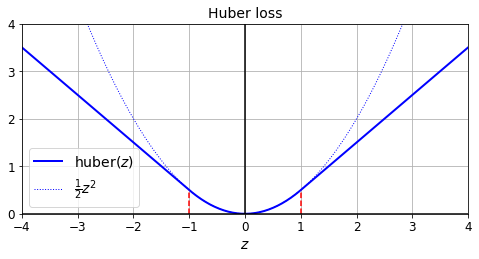

In [67]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [68]:
input_shape = X_train.shape[1:]
input_shape

(8,)

In [69]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer = "lecun_normal",
                      input_shape=input_shape),
    keras.layers.Dense(1)
])

In [70]:
model.compile(loss=huber_fn, optimizer = "nadam", metrics=["mae"])

In [71]:
model.fit(X_train_scaled, y_train, epochs=2,
         validation_data = (X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 2s 189us/sample - loss: 0.6280 - mae: 0.9992 - val_loss: 0.2920 - val_mae: 0.5975
Epoch 2/2
11610/11610 [==============================] - 1s 58us/sample - loss: 0.2203 - mae: 0.5187 - val_loss: 0.2324 - val_mae: 0.5196


## Saving/Loading Models with Custom Objects

In [72]:
model.save("my_model_with_a_custom_loss.h5")

In [73]:
model = keras.models.load_model("my_model_with_a_custom_loss.h5",
                               custom_objects={"huber_fn": huber_fn})

In [74]:
model.fit(X_train_scaled, y_train, epochs=2,
         validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 116us/sample - loss: 0.2051 - mae: 0.4976 - val_loss: 0.2206 - val_mae: 0.5103
Epoch 2/2
11610/11610 [==============================] - 1s 59us/sample - loss: 0.2004 - mae: 0.4907 - val_loss: 0.2026 - val_mae: 0.4851


In [75]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [76]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

In [77]:
model.fit(X_train_scaled, y_train, epochs=2,
         validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 2s 157us/sample - loss: 0.2213 - mae: 0.4882 - val_loss: 0.2422 - val_mae: 0.5022
Epoch 2/2
11610/11610 [==============================] - 1s 56us/sample - loss: 0.2183 - mae: 0.4849 - val_loss: 0.2075 - val_mae: 0.4668


In [78]:
model.save("my_model_with_a_custom_loss_threshold_2.h5")

In [79]:
model = keras.models.load_model("my_model_with_a_custom_loss_threshold_2.h5",
                               custom_objects = {"huber_fn": create_huber(2.0)})

In [80]:
model.fit(X_train_scaled, y_train, epochs=2,
         validation_data =(X_valid_scaled, y_valid)
)

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 120us/sample - loss: 0.2135 - mae: 0.4786 - val_loss: 0.2246 - val_mae: 0.4877
Epoch 2/2
11610/11610 [==============================] - 1s 59us/sample - loss: 0.2121 - mae: 0.4766 - val_loss: 0.2025 - val_mae: 0.4596


In [81]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss = self.threshold * tf.abs(error) - self.threshold ** 2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [82]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                      input_shape=input_shape),
    keras.layers.Dense(1)
])

In [83]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

In [84]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 2s 149us/sample - loss: 0.6910 - mae: 0.8770 - val_loss: 0.3483 - val_mae: 0.5618
Epoch 2/2
11610/11610 [==============================] - 1s 60us/sample - loss: 0.2404 - mae: 0.5084 - val_loss: 0.2373 - val_mae: 0.4873


In [85]:
model.save("my_model_with_a_custom_loss_class.h5")

In [87]:
# model = keras.models.load_model("my_model_with_a_custom_loss_class.h5",
#                                custom_objects = {"HuberLoss": HuberLoss})

In [88]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 63us/sample - loss: 0.2268 - mae: 0.4945 - val_loss: 0.2212 - val_mae: 0.4891
Epoch 2/2
11610/11610 [==============================] - 1s 63us/sample - loss: 0.2202 - mae: 0.4897 - val_loss: 0.2231 - val_mae: 0.4758


In [89]:
model.loss.threshold

2.0

## Other custom functions

In [90]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def my_softplus(z):
    return tf.math.log(tf.exp(z) + 1.0)

In [ ]:
def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / shape[0] + shape[1])
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

In [122]:
def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

In [123]:
def my_positive_weights(weights):
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [99]:
def my_softplus(z): # return value is just tf.nn.softplus(z)
    return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights): # return value is just tf.nn.relu(weights)
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [100]:
layer = keras.layers.Dense(1, activation=my_softplus,
                          kernel_initializer=my_glorot_initializer,
                          kernel_regularizer=my_l1_regularizer,
                          kernel_constraint = my_positive_weights)

In [101]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [102]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=my_l1_regularizer,
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [103]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [104]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 2s 155us/sample - loss: 1.4956 - mae: 0.8797 - val_loss: 2.6089 - val_mae: 0.5787
Epoch 2/2
11610/11610 [==============================] - 1s 59us/sample - loss: 0.5896 - mae: 0.5271 - val_loss: 1.5789 - val_mae: 0.5117


In [105]:
model.save("my_model_with_many_custom_parts.h5")

In [106]:
# model = keras.models.load_model(
#     "my_model_with_many_custom_parts.h5",
#     custom_objects={
#        "my_l1_regularizer": my_l1_regularizer,
#        "my_positive_weights": my_positive_weights,
#        "my_glorot_initializer": my_glorot_initializer,
#        "my_softplus": my_softplus,
#     })

ValueError: Could not interpret constraint identifier: tf.Tensor(0, shape=(), dtype=int32)

In [107]:
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor": self.factor}

In [108]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [109]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=MyL1Regularizer(0.01),
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [110]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [111]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 2s 190us/sample - loss: 1.4956 - mae: 0.8797 - val_loss: 2.6089 - val_mae: 0.5787
Epoch 2/2
11610/11610 [==============================] - 1s 75us/sample - loss: 0.5896 - mae: 0.5271 - val_loss: 1.5789 - val_mae: 0.5117


In [112]:
model.save("my_model_with_many_custom_parts.h5")

In [114]:
# model = keras.models.load_model(
#     "my_model_with_many_custom_parts.h5",
#     custom_objects={
#        "MyL1Regularizer": MyL1Regularizer,
#        "my_positive_weights": my_positive_weights,
#        "my_glorot_initializer": my_glorot_initializer,
#        "my_softplus": my_softplus,
#     })

## Custom metrics

In [115]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [116]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [117]:
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

In [118]:
model.fit(X_train_scaled, y_train, epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 120us/sample - loss: 2.0666 - huber_fn: 0.9167
Epoch 2/2
11610/11610 [==============================] - 1s 44us/sample - loss: 0.5837 - huber_fn: 0.2699


In [119]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[create_huber(2.0)])

In [120]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)
# metrics and loss are

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 2s 149us/sample - loss: 0.1172 - huber_fn: 0.2368
Epoch 2/2
11610/11610 [==============================] - 1s 64us/sample - loss: 0.1131 - huber_fn: 0.2298


In [127]:
history.history["loss"][0], history.history["huber_fn"][0] * sample_weight.mean()

(0.1172271099175799, 0.11751653543466516)

## Streaming metrics

In [128]:
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: id=43502, shape=(), dtype=float32, numpy=0.8>

In [129]:
# it gets accumulated from the above. this precision itself is a 0
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: id=43549, shape=(), dtype=float32, numpy=0.5>

In [130]:
precision.result()

<tf.Tensor: id=43558, shape=(), dtype=float32, numpy=0.5>

In [131]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [132]:
precision.reset_states()

In [140]:
# add_weight tf.keras.layer function
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")
#     def huber_fn(self, y_true, y_pred): # workaround
#         error = y_true - y_pred
#         is_small_error = tf.abs(error) < self.threshold
#         squared_loss = tf.square(error) / 2
#         linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
#         return tf.where(is_small_error, squared_loss, linear_loss)
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        return self.total / self.count
    def get_confg(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [141]:
m = HuberMetric(2.)
m(tf.constant([[2.]]), tf.constant([[10.]])) 

<tf.Tensor: id=43717, shape=(), dtype=float32, numpy=14.0>

In [142]:
m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

m.result()

<tf.Tensor: id=43748, shape=(), dtype=float32, numpy=7.0>

In [143]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [144]:
m.reset_states()
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

In [145]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [147]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [148]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[HuberMetric(2.0)])

In [149]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 2s 150us/sample - loss: 0.8702 - huber_metric_1: 0.8702
Epoch 2/2
11610/11610 [==============================] - 1s 47us/sample - loss: 0.2603 - huber_metric_1: 0.2603


In [150]:
model.save("my_model_with_a_custom_metric.h5")

In [151]:
model.metrics[-1].threshold

2.0

In [152]:
class HuberMetric(keras.metrics.Mean):
    def __init__(self, threshold=1.0, name='HuberMetric', dtype=None):
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        super().__init__(name=name, dtype=dtype)
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        super(HuberMetric, self).update_state(metric, sample_weight)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [153]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [154]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [155]:
model.compile(loss=keras.losses.Huber(2.0), optimizer="nadam", weighted_metrics=[HuberMetric(2.0)])

In [156]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32),
                    epochs=2, sample_weight=sample_weight)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 84us/sample - loss: 0.4336 - HuberMetric: 0.8739
Epoch 2/2
11610/11610 [==============================] - 1s 43us/sample - loss: 0.1298 - HuberMetric: 0.2615


In [157]:
history.history["loss"][0], history.history["HuberMetric"][0] * sample_weight.mean()

(0.4336462564926842, 0.43364639481949674)

In [158]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 51us/sample - loss: 0.2378 - HuberMetric: 0.2378
Epoch 2/2
11610/11610 [==============================] - 0s 42us/sample - loss: 0.2279 - HuberMetric: 0.2279


## Custom Layers

In [160]:
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [161]:
exponential_layer([-1.,0.,1.])

<tf.Tensor: id=56878, shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

In [170]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [171]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer
])
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 2s 143us/sample - loss: nan - val_loss: nan
Epoch 2/5
11610/11610 [==============================] - 1s 58us/sample - loss: nan - val_loss: nan
Epoch 3/5
11610/11610 [==============================] - 1s 59us/sample - loss: nan - val_loss: nan
Epoch 4/5
11610/11610 [==============================] - 1s 58us/sample - loss: nan - val_loss: nan
Epoch 5/5
11610/11610 [==============================] - 1s 58us/sample - loss: nan - val_loss: nan


In [172]:
model.evaluate(X_test_scaled, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

nan

In [180]:
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape) # must be at the end

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation)}

In [181]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [182]:
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])

In [183]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 2s 165us/sample - loss: 2.1345 - val_loss: 1.0399
Epoch 2/2
11610/11610 [==============================] - 1s 57us/sample - loss: 0.6441 - val_loss: 0.5284
5160/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.5410040833229243

In [184]:
model.save("my_model_with_a_custom_layer.h5")

In [185]:
model = keras.models.load_model("my_model_with_a_custom_layer.h5",
                                custom_objects={"MyDense": MyDense})

In [186]:
class MyMultiLayer(keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        return X1 + X2, X1 * X2
    def compute_output_shape(self, batch_input_shape):
        batch_input_shape1, batch_input_shape2 = batch_input_shape
        return [batch_input_shape1, batch_input_shape2]

In [187]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [189]:
inputs1 = keras.layers.Input(shape=[2])
inputs2 = keras.layers.Input(shape=[2])
outputs1, outputs2 = MyMultiLayer()((inputs1, inputs2))
outputs1

<tf.Tensor 'my_multi_layer/Identity:0' shape=(None, 2) dtype=float32>

In [190]:
inputs1

<tf.Tensor 'input_3:0' shape=(None, 2) dtype=float32>

In [191]:
class AddGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev
    
    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev = self.stddev)
            return X + noise
        else:
            return X
    def compute_ouput_shape(self, batch_input_shape):
        return batch_input_shape

In [195]:
model.add(AddGaussianNoise(1))
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 123us/sample - loss: 1.3997 - val_loss: 1.2182
Epoch 2/2
11610/11610 [==============================] - 1s 54us/sample - loss: 1.4050 - val_loss: 0.4683
5160/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.3840882588264554

## Custom Models

In [196]:
X_new_scaled = X_test_scaled

In [197]:
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu",
                                         kernel_initializer="he_normal")
                      for _ in range(n_layers)]
    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

In [198]:
class ResidualRegressor(keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30, activation="elu",
                                         kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)
        
    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

In [199]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [200]:
model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)
score

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 2s 204us/sample - loss: 7.1528
Epoch 2/5
11610/11610 [==============================] - 1s 71us/sample - loss: 1.5936
Epoch 3/5
11610/11610 [==============================] - 1s 73us/sample - loss: 1.5621
Epoch 4/5
11610/11610 [==============================] - 1s 74us/sample - loss: 0.5444
Epoch 5/5
11610/11610 [==============================] - 1s 70us/sample - loss: 0.5147
5160/1 [=====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.6907187864761944

In [201]:
model.summary()

Model: "residual_regressor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  270       
_________________________________________________________________
residual_block (ResidualBloc multiple                  1860      
_________________________________________________________________
residual_block_1 (ResidualBl multiple                  1860      
_________________________________________________________________
dense_5 (Dense)              multiple                  31        
Total params: 4,021
Trainable params: 4,021
Non-trainable params: 0
_________________________________________________________________


In [202]:
model.save("my_custom_model.ckpt")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_custom_model.ckpt\assets


In [203]:
model = keras.models.load_model("my_custom_model.ckpt")

In [204]:
history = model.fit(X_train_scaled, y_train, epochs=5)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 3s 250us/sample - loss: 0.8278
Epoch 2/5
11610/11610 [==============================] - 1s 66us/sample - loss: 0.4502
Epoch 3/5
11610/11610 [==============================] - 1s 68us/sample - loss: 0.4871
Epoch 4/5
11610/11610 [==============================] - 1s 69us/sample - loss: 0.6590
Epoch 5/5
11610/11610 [==============================] - 1s 67us/sample - loss: 0.4648


In [205]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [211]:
block1 = ResidualBlock(2, 30)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal"),
    block1,
    ResidualBlock(2, 30),
    keras.layers.Dense(30)
])

In [213]:
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 2s 204us/sample - loss: 0.3891
Epoch 2/5
11610/11610 [==============================] - 1s 70us/sample - loss: 0.3683
Epoch 3/5
11610/11610 [==============================] - 1s 80us/sample - loss: 0.3595
Epoch 4/5
11610/11610 [==============================] - 1s 76us/sample - loss: 0.3664
Epoch 5/5
11610/11610 [==============================] - 1s 78us/sample - loss: 0.3502
5160/1 [=====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [214]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             multiple                  270       
_________________________________________________________________
residual_block_4 (ResidualBl multiple                  1860      
_________________________________________________________________
residual_block_5 (ResidualBl multiple                  1860      
_________________________________________________________________
dense_16 (Dense)             multiple                  930       
Total params: 4,920
Trainable params: 4,920
Non-trainable params: 0
_________________________________________________________________


## Losses and Metrics Based on Model Internals

In [215]:
class ReconstructingRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(30, activation="selu",
                                          kernel_initializer="lecun_normal")
                       for _ in range(5)]
        self.out = keras.layers.Dense(output_dim)
    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = keras.layers.Dense(n_inputs)
        super().build(batch_input_shape)
    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
        return self.out(Z)

In [216]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [217]:
model = ReconstructingRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=2)
y_pred = model.predict(X_test_scaled)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 4s 339us/sample - loss: 0.7969
Epoch 2/2
11610/11610 [==============================] - 1s 70us/sample - loss: 0.4136


## Computing Gradients with Autodiff

In [218]:
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

In [219]:
w1, w2 = 5,3

In [220]:
eps = 1e-6

In [221]:
(f(w1 + eps, w2) - f(w1, w2)) / eps

36.000003007075065

In [223]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1, w2)
gradients = tape.gradient(z, [w1, w2])
gradients

[<tf.Tensor: id=131265, shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: id=131257, shape=(), dtype=float32, numpy=10.0>]

In [229]:
with tf.GradientTape(persistent=False) as tape:
    z = f(w1, w2)
dz_dw1 = tape.gradient(z, w1)
dz_dw1

<tf.Tensor: id=131373, shape=(), dtype=float32, numpy=36.0>

In [230]:
try:
    dz_dw2 = tape.gradient(z, w2)
except RuntimeError as ex:
    print(ex)

GradientTape.gradient can only be called once on non-persistent tapes.


In [231]:
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2) # works now!
del tape

In [232]:
dz_dw1, dz_dw2

(<tf.Tensor: id=131397, shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: id=131402, shape=(), dtype=float32, numpy=10.0>)

In [234]:
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    z = f(c1, c2)
gradients = tape.gradient(z, [c1,c2])
gradients

[None, None]

In [236]:
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])
gradients

[<tf.Tensor: id=131484, shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: id=131476, shape=(), dtype=float32, numpy=10.0>]

In [239]:
with tf.GradientTape() as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)
    
tape.gradient([z1, z2, z3], [w1, w2])
# result is sum of z1, z2, z3

[<tf.Tensor: id=131714, shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: id=131715, shape=(), dtype=float32, numpy=30.0>]

In [241]:
with tf.GradientTape(persistent=True) as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)
    
a = tf.reduce_sum(tf.stack([tape.gradient(z, [w1, w2]) for z in (z1, z2, z3)]), axis=0)
print(a)
del tape

tf.Tensor([136.  30.], shape=(2,), dtype=float32)


In [242]:
with tf.GradientTape(persistent=True) as hessian_tape:
    with tf.GradientTape() as jacobian_tape:
        z = f(w1, w2)
    jacobians = jacobian_tape.gradient(z, [w1, w2])
hessians = [hessian_tape.gradient(jacobian, [w1, w2])
           for jacobian in jacobians]
del hessian_tape

In [243]:
jacobians

[<tf.Tensor: id=131907, shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: id=131899, shape=(), dtype=float32, numpy=10.0>]

In [244]:
hessians

[[<tf.Tensor: id=131916, shape=(), dtype=float32, numpy=6.0>,
  <tf.Tensor: id=131918, shape=(), dtype=float32, numpy=2.0>],
 [<tf.Tensor: id=131923, shape=(), dtype=float32, numpy=2.0>, None]]

In [245]:
def f(w1, w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)
with tf.GradientTape() as tape:
    z = f(w1, w2) # same result as without stop_gradient()
gradients = tape.gradient(z, [w1, w2])
gradients

[<tf.Tensor: id=131943, shape=(), dtype=float32, numpy=30.0>, None]

In [246]:
x = tf.Variable([100.])
with tf.GradientTape() as tape:
    z = my_softplus(x)
tape.gradient(z, [x])

[<tf.Tensor: id=131961, shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>]

In [247]:
tf.math.log(tf.exp(tf.constant(30., dtype=tf.float32)) + 1.)

<tf.Tensor: id=131966, shape=(), dtype=float32, numpy=30.0>

In [248]:
@tf.custom_gradient
def my_better_softplus(z):
    exp = tf.exp(z)
    def my_softplus_gradients(grad):
        return grad / (1 + 1/ exp)
    return tf.math.log(exp + 1), my_softplus_gradients

In [250]:
def my_better_softplus(z):
    return tf.where(z > 30., z, tf.math.log(tf.exp(z) + 1.))

In [251]:
x = tf.Variable([1000.])
with tf.GradientTape() as tape:
    z = my_better_softplus(x)

z, tape.gradient(z, [x])

(<tf.Tensor: id=132005, shape=(1,), dtype=float32, numpy=array([1000.], dtype=float32)>,
 [<tf.Tensor: id=132026, shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>])

## Computing Gradients Using Autodiff

In [252]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [253]:
l2_reg = keras.regularizers.l2(0.05)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal",
                       kernel_regularizer=l2_reg),
    keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

In [254]:
def random_batch(X, y, batch_size=32):
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

In [255]:
def print_status_bar(iteration, total, loss, metrics=None):
    metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())
                         for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print("\r{}/{} - ".format(iteration, total) + metrics,
          end=end)

In [256]:
import time

mean_loss = keras.metrics.Mean(name="loss")
mean_square = keras.metrics.Mean(name="mean_square")
for i in range(1, 50 + 1):
    loss = 1 / i
    mean_loss(loss)
    mean_square(i ** 2)
    print_status_bar(i, 50, mean_loss, [mean_square])
    time.sleep(0.05)

50/50 - loss: 0.0900 - mean_square: 858.5000


In [257]:
def progress_bar(iteration, total, size=30):
    running = iteration < total
    c = ">" if running else "="
    p = (size - 1) * iteration // total
    fmt = "{{:-{}d}}/{{}} [{{}}]".format(len(str(total)))
    params = [iteration, total, "=" * p + c + "." * (size - p - 1)]
    return fmt.format(*params)

In [258]:
progress_bar(3500, 10000, size=6)

' 3500/10000 [=>....]'

## TensorFlow functions

In [259]:
def cube(x):
    return x **3

In [260]:
cube(2)

8

In [261]:
cube(tf.constant(2.0))

<tf.Tensor: id=133211, shape=(), dtype=float32, numpy=8.0>

In [262]:
tf_cube = tf.function(cube)
tf_cube

In [263]:
tf_cube(2)

<tf.Tensor: id=133217, shape=(), dtype=int32, numpy=8>

In [264]:
tf_cube(tf.constant(2.0))

<tf.Tensor: id=133225, shape=(), dtype=float32, numpy=8.0>

## TF functions and Concrete Functions

In [265]:
concrete_function = tf_cube.get_concrete_function(tf.constant(2.0))
concrete_function.graph

In [266]:
concrete_function(tf.constant(2.0))

<tf.Tensor: id=133228, shape=(), dtype=float32, numpy=8.0>

In [267]:
concrete_function is tf_cube.get_concrete_function(tf.constant(2.0))

True

## Exploring Function Definitions and Graph

In [268]:
concrete_function.graph

In [269]:
ops = concrete_function.graph.get_operations()
ops

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'pow/y' type=Const>,
 <tf.Operation 'pow' type=Pow>,
 <tf.Operation 'Identity' type=Identity>]

In [270]:
pow_op = ops[2]
list(pow_op.inputs)

[<tf.Tensor 'x:0' shape=() dtype=float32>,
 <tf.Tensor 'pow/y:0' shape=() dtype=float32>]

In [271]:
pow_op.outputs

[<tf.Tensor 'pow:0' shape=() dtype=float32>]

In [272]:
concrete_function.graph.get_operation_by_name('x')

<tf.Operation 'x' type=Placeholder>

In [273]:
concrete_function.graph.get_tensor_by_name('Identity:0')

<tf.Tensor 'Identity:0' shape=() dtype=float32>

In [274]:
concrete_function.function_def.signature

name: "__inference_cube_133224"
input_arg {
  name: "x"
  type: DT_FLOAT
}
output_arg {
  name: "identity"
  type: DT_FLOAT
}

### How TF Functions Trace Python Functions to Extract Their Computation Graphs

In [276]:
@tf.function
def tf_cube(x):
    print("print:", x)
    return x ** 3

In [277]:
result = tf_cube(tf.constant(2.0))

print: Tensor("x:0", shape=(), dtype=float32)


In [278]:
result

<tf.Tensor: id=133238, shape=(), dtype=float32, numpy=8.0>

In [279]:
result = tf_cube(2)
result = tf_cube(3)
result = tf_cube(tf.constant([[1., 2.]])) # New shape: trace!
result = tf_cube(tf.constant([[3., 4.], [5., 6.]])) # New shape: trace!
result = tf_cube(tf.constant([[7., 8.], [9., 10.], [11., 12.]])) # no trace

print: 2
print: 3
print: Tensor("x:0", shape=(1, 2), dtype=float32)
print: Tensor("x:0", shape=(2, 2), dtype=float32)
print: Tensor("x:0", shape=(3, 2), dtype=float32)


In [282]:
@tf.function(input_signature=[tf.TensorSpec([None, 28, 28], tf.float32)])
def shrink(images):
    print("Tracing", images)
    return images[:, ::2, ::2]
# 'nothing for the first argument, nothing for the second, and jump by three

In [281]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [283]:
img_batch_1 = tf.random.uniform(shape=[100, 28, 28])
img_batch_2 = tf.random.uniform(shape=[50, 28, 28])
preprocessed_images = shrink(img_batch_1)
preprocessed_images = shrink(img_batch_2)

Tracing Tensor("images:0", shape=(None, 28, 28), dtype=float32)


In [284]:
img_batch_3 = tf.random.uniform(shape=[2, 2, 2])
try:
    preprocessed_images = shrink(img_batch_3)  # rejects unexpected types or shapes
except ValueError as ex:
    print(ex)

Python inputs incompatible with input_signature:
  inputs: (
    tf.Tensor(
[[[0.7413678  0.62854624]
  [0.01738465 0.3431449 ]]

 [[0.51063764 0.3777541 ]
  [0.07321596 0.02137029]]], shape=(2, 2, 2), dtype=float32))
  input_signature: (
    TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None))


## Using Autograph to capture control Flow

In [285]:
@tf.function
def add_10(x):
    for i in range(10):
        x += 1
    return x

In [286]:
add_10(tf.constant(5))

<tf.Tensor: id=133335, shape=(), dtype=int32, numpy=15>

In [287]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'add/y' type=Const>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'add_1/y' type=Const>,
 <tf.Operation 'add_1' type=AddV2>,
 <tf.Operation 'add_2/y' type=Const>,
 <tf.Operation 'add_2' type=AddV2>,
 <tf.Operation 'add_3/y' type=Const>,
 <tf.Operation 'add_3' type=AddV2>,
 <tf.Operation 'add_4/y' type=Const>,
 <tf.Operation 'add_4' type=AddV2>,
 <tf.Operation 'add_5/y' type=Const>,
 <tf.Operation 'add_5' type=AddV2>,
 <tf.Operation 'add_6/y' type=Const>,
 <tf.Operation 'add_6' type=AddV2>,
 <tf.Operation 'add_7/y' type=Const>,
 <tf.Operation 'add_7' type=AddV2>,
 <tf.Operation 'add_8/y' type=Const>,
 <tf.Operation 'add_8' type=AddV2>,
 <tf.Operation 'add_9/y' type=Const>,
 <tf.Operation 'add_9' type=AddV2>,
 <tf.Operation 'Identity' type=Identity>]

In [291]:
@tf.function
def add_10(x):
    condition = lambda i, x: tf.less(i, 10)
    body = lambda i, x: (tf.add(i, 1), tf.add(x, 1))
    final_i, final_x = tf.while_loop(condition, body, [tf.constant(0), x])
    return final_x

In [292]:
add_10(tf.constant(5))

<tf.Tensor: id=133422, shape=(), dtype=int32, numpy=15>

In [293]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'Const' type=Const>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=While>,
 <tf.Operation 'while/Identity' type=Identity>,
 <tf.Operation 'while/Identity_1' type=Identity>,
 <tf.Operation 'while/Identity_2' type=Identity>,
 <tf.Operation 'while/Identity_3' type=Identity>,
 <tf.Operation 'Identity' type=Identity>]

In [294]:
@tf.function
def add_10(x):
    for i in tf.range(10):
        x = x + 1
    return x

In [295]:
add_10.get_concrete_function(tf.constant(0)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'range/start' type=Const>,
 <tf.Operation 'range/limit' type=Const>,
 <tf.Operation 'range/delta' type=Const>,
 <tf.Operation 'range' type=Range>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=While>,
 <tf.Operation 'while/Identity' type=Identity>,
 <tf.Operation 'while/Identity_1' type=Identity>,
 <tf.Operation 'while/Identity_2' type=Identity>,
 <tf.Operation 'while/Identity_3' type=Identity>,
 <tf.Operation 'while/Identity_4' type=Identity>,
 <tf.Operation 'while/Identity_5' type=Identity>,
 <tf.Operation 'Identity' type=Identity>]

## Handling Variables and Other Resources in TF Functions

In [296]:
counter = tf.Variable(0)

@tf.function
def increment(counter, c=1):
    return counter.assign_add(c)

In [298]:
increment(counter)
increment(counter)

<tf.Tensor: id=133494, shape=(), dtype=int32, numpy=4>

In [299]:
function_def = increment.get_concrete_function(counter).function_def
function_def.signature.input_arg[0]

name: "counter"
type: DT_RESOURCE

In [300]:
counter = tf.Variable(0)

@tf.function
def increment(c=1):
    return counter.assign_add(c)

In [301]:
increment()
increment()

<tf.Tensor: id=133510, shape=(), dtype=int32, numpy=2>

In [302]:
function_def = increment.get_concrete_function().function_def
function_def.signature.input_arg[0]

name: "assignaddvariableop_resource"
type: DT_RESOURCE

In [303]:
class Counter:
    def __init__(self):
        self.counter = tf.Variable(0)

    @tf.function
    def increment(self, c=1):
        return self.counter.assign_add(c)

In [304]:
c = Counter()
c.increment()
c.increment()

<tf.Tensor: id=133526, shape=(), dtype=int32, numpy=2>

In [305]:
@tf.function
def add_10(x):
    for i in tf.range(10):
        x += 1
    return x

tf.autograph.to_code(add_10.python_function)

"def tf__add_10(x):\n  do_return = False\n  retval_ = ag__.UndefinedReturnValue()\n  with ag__.FunctionScope('add_10', 'add_10_scope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as add_10_scope:\n\n    def get_state():\n      return ()\n\n    def set_state(_):\n      pass\n\n    def loop_body(iterates, x):\n      i = iterates\n      x += 1\n      return x,\n    x, = ag__.for_stmt(ag__.converted_call(tf.range, add_10_scope.callopts, (10,), None, add_10_scope), None, loop_body, get_state, set_state, (x,), ('x',), ())\n    do_return = True\n    retval_ = add_10_scope.mark_return_value(x)\n  do_return,\n  return ag__.retval(retval_)\n"

In [306]:
def display_tf_code(func):
    from IPython.display import display, Markdown
    if hasattr(func, "python_function"):
        func = func.python_function
    code = tf.autograph.to_code(func)
    display(Markdown('```python\n{}\n```'.format(code)))

In [307]:
display_tf_code(add_10)

```python
def tf__add_10(x):
  do_return = False
  retval_ = ag__.UndefinedReturnValue()
  with ag__.FunctionScope('add_10', 'add_10_scope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as add_10_scope:

    def get_state():
      return ()

    def set_state(_):
      pass

    def loop_body(iterates, x):
      i = iterates
      x += 1
      return x,
    x, = ag__.for_stmt(ag__.converted_call(tf.range, add_10_scope.callopts, (10,), None, add_10_scope), None, loop_body, get_state, set_state, (x,), ('x',), ())
    do_return = True
    retval_ = add_10_scope.mark_return_value(x)
  do_return,
  return ag__.retval(retval_)

```

## Using TF Functions with tf.keras(Or Not)

In [308]:
def my_mse(y_true, y_pred):
    print("Tracing loss my_mse()")
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [309]:
def my_mae(y_true, y_pred):
    print("Tracing metric my_mae()")
    return tf.reduce_mean(tf.abs(y_pred - y_true))

In [316]:
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)
    def build(self, input_shape):
        self.kernel = self.add_weight(name="kernel",
                                     shape=(input_shape[1], self.units),
                                     initializer="uniform",
                                     trainable=True)
        self.biases = self.add_weight(name="bias",
                                     shape=(self.units),
                                     initializer="zero",
                                     trainable=True)
        super().build(input_shape)
    def call(self, X):
        print("Tracing MyDense.call()")
        return self.activation(X @ self.kernel + self.biases)

In [317]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [319]:
class MyModel(keras.models.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = MyDense(30, activation="relu")
        self.hidden2 = MyDense(30, activation="relu")
        self.output_ = MyDense(1)
    def call(self, input):
        print("Tracing MyModel.call()")
        hidden1 = self.hidden1(input)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input, hidden1])
        output = self.output_(concat)
        return output
model = MyModel()

In [320]:
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae])

In [321]:
model.fit(X_train_scaled, y_train, epochs=2,
         validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing metric my_mae()
Tracing loss my_mse()
Train on 11610 samples, validate on 3870 samples
Epoch 1/2
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
11328/11610 [============================>.] - ETA: 0s - loss: 1.9820 - my_mae: 1.0346Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
11610/11610 [==============================] - 2s 175us/sample - loss: 1.9511 - my_mae: 1.0242 - val_loss: 0.8430 - val_my_mae: 0.5749
Epoch 2/2
11610/11610 [==============================] - 1s 59us/sample - loss: 0.5169 - my_mae: 0.5251 - val_loss: 0.4259 - val_my_mae: 0.4723
5160/1 [================

[0.45193089126616487, 0.48970833]

In [322]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [323]:
model = MyModel(dynamic=True)

In [324]:
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae])

In [325]:
model.fit(X_train_scaled[:64], y_train[:64], epochs=1,
          validation_data=(X_valid_scaled[:64], y_valid[:64]), verbose=0)
model.evaluate(X_test_scaled[:64], y_test[:64], verbose=0)

Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()


[5.501562595367432, 2.0542557]

## Custom Optimizers

In [327]:
class MyMomentumOptimizer(keras.optimizers.Optimizer):
    def __init__(self, learning_rate=0.001, momentum=0.9, name="MyMomentumOptimizer",
                **kwargs):
        super().__init__(name, **kwargs)
        self._set_hyper("learning_rate", kwargs.get("lr", learning_rate))
        self._set_hyper("decay", self._initial_decay)
        self._set_hyper("momentum", momentum)
    
    def _create_slots(self, var_list):
        for var in var_list:
            self.add_slot(var, "momentum")
    
    @tf.function
    def _resource_apply_dense(self, grad, var):
        var_dtype = var.dtype.base_dtype
        lr_t = self._decayed_lr(var_dtype)
        momentum_var = self.get_slot(var, "momentum")
        momentum_hyper = self._get_hyper('momentum', var_dtype)
        momentum_var.assign(momentum_var * momentum_hyper - (1. - momentum_hyper)*
                           grad)
        var.assign_add(momentum_var * lr_t)
        
    def _resource_apply_sparse(self, grad, var):
        raise NotImplementedError
        
    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "learning_rate": self._serialize_hyperparameter("learning_rate"),
            "decay": self._serialize_hyperparameter("decay"),
            "momentum": self._serialize_hyperparameter("momentum")
        }
        

In [328]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [329]:
model = keras.models.Sequential([keras.layers.Dense(1, input_shape=[8])])
model.compile(loss="mse", optimizer=MyMomentumOptimizer())
model.fit(X_train_scaled, y_train, epochs=5)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 1s 116us/sample - loss: 3.8110
Epoch 2/5
11610/11610 [==============================] - 0s 40us/sample - loss: 1.4881
Epoch 3/5
11610/11610 [==============================] - 0s 38us/sample - loss: 0.9175
Epoch 4/5
11610/11610 [==============================] - 0s 40us/sample - loss: 0.7589
Epoch 5/5
11610/11610 [==============================] - 0s 37us/sample - loss: 0.7052
